In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Data and Organize Timeseries

In [43]:
d = pd.read_csv('covid-19-data/us-counties.csv')

counties = [
    # county, state, population
    # all populations based on Wikipedia 2020 estimates
    ('New York City, New York', 8398748),
    ('Los Angeles, California', 10105518),
    ('Cook, Illinois', 5150233), # Chicago
    ('King, Washington', 753675), # Seattle
    ('San Francisco, California', 881549),
    ('San Diego, California', 3338330),
]
# pivot_table is simpler if we have one combined column with county + state.
# This matches the format of 'counties' above.
d.loc[:, 'county_state'] = d['county'] + ', ' + d['state']

# Filter to only the counties we care about
d_filtered = d[d.county_state.isin([c[0] for c in counties])]

cases_tot_df = d_filtered.pivot_table('cases', 'date', 'county_state')
deaths_tot_df = d_filtered.pivot_table('deaths', 'date', 'county_state')

cases_by_pop_df = cases_tot_df.copy()
deaths_by_pop_df = deaths_tot_df.copy()

for county, pop in counties:
    cases_by_pop_df.loc[:, county] /= (pop / 1000)
    deaths_by_pop_df.loc[:, county] /= (pop / 1000)

In [44]:
deaths_tot_df

county_state,"Cook, Illinois","King, Washington","Los Angeles, California","New York City, New York","San Diego, California","San Francisco, California"
date,,,,,,
2020-01-24,0.0,NaN,NaN,NaN,NaN,NaN
2020-01-25,0.0,NaN,NaN,NaN,NaN,NaN
2020-01-26,0.0,NaN,0.0,NaN,NaN,NaN
2020-01-27,0.0,NaN,0.0,NaN,NaN,NaN
2020-01-28,0.0,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...
2020-10-15,5332.0,810.0,6834.0,23915.0,847.0,126.0
2020-10-16,5340.0,811.0,6855.0,23915.0,865.0,131.0
2020-10-17,5350.0,812.0,6863.0,23925.0,869.0,133.0


# Table of Cases

In [45]:
cases_tot_df

county_state,"Cook, Illinois","King, Washington","Los Angeles, California","New York City, New York","San Diego, California","San Francisco, California"
date,,,,,,
2020-01-24,1.0,NaN,NaN,NaN,NaN,NaN
2020-01-25,1.0,NaN,NaN,NaN,NaN,NaN
2020-01-26,1.0,NaN,1.0,NaN,NaN,NaN
2020-01-27,1.0,NaN,1.0,NaN,NaN,NaN
2020-01-28,1.0,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...
2020-10-15,159035.0,24668.0,286183.0,256986.0,51533.0,11786.0
2020-10-16,160645.0,24792.0,287222.0,257642.0,51844.0,11811.0
2020-10-17,162220.0,25011.0,288136.0,258452.0,52045.0,11843.0


# Table of Deaths

In [46]:
deaths_tot_df

county_state,"Cook, Illinois","King, Washington","Los Angeles, California","New York City, New York","San Diego, California","San Francisco, California"
date,,,,,,
2020-01-24,0.0,NaN,NaN,NaN,NaN,NaN
2020-01-25,0.0,NaN,NaN,NaN,NaN,NaN
2020-01-26,0.0,NaN,0.0,NaN,NaN,NaN
2020-01-27,0.0,NaN,0.0,NaN,NaN,NaN
2020-01-28,0.0,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...
2020-10-15,5332.0,810.0,6834.0,23915.0,847.0,126.0
2020-10-16,5340.0,811.0,6855.0,23915.0,865.0,131.0
2020-10-17,5350.0,812.0,6863.0,23925.0,869.0,133.0


In [47]:
def show_graphs(data, title, logy, avg_days):    
    figsize = (10, 6)
    if avg_days > 1:
        data = data.copy().rolling(window=avg_days).mean()

    scale_note = "log" if logy else "linear"
    maybe_avg_note = f", {avg_days} rolling avg" if avg_days > 1 else ""
    full_title_per_day = f"{title} per day ({scale_note}{maybe_avg_note})"
    full_title_cum = f"{title} cumulative ({scale_note}{maybe_avg_note})"
    data.diff().plot(figsize=figsize, rot=45, grid=True, logy=logy, title=full_title_per_day)
    data.plot(figsize=figsize, rot=45, grid=True, logy=logy, title=full_title_cum)

# Total cases

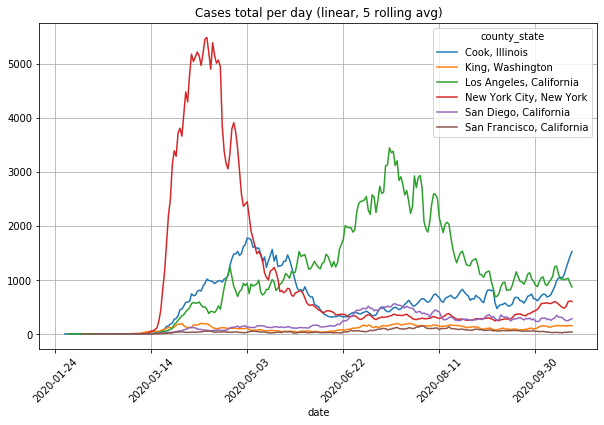

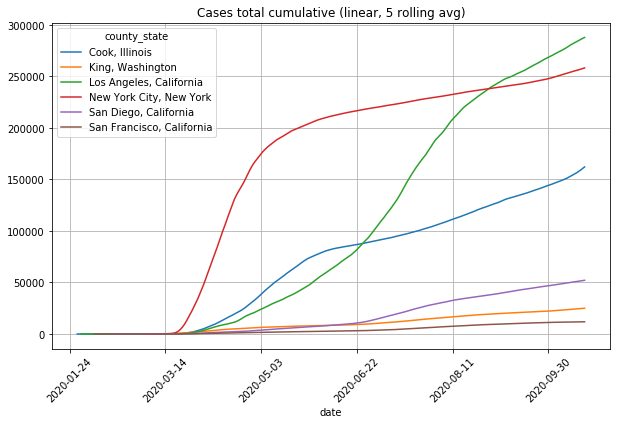

In [48]:
show_graphs(cases_tot_df, "Cases total", False, 5)

# Cases per 1000 people

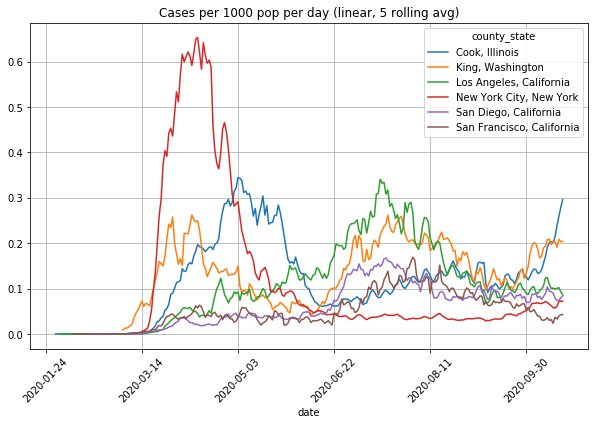

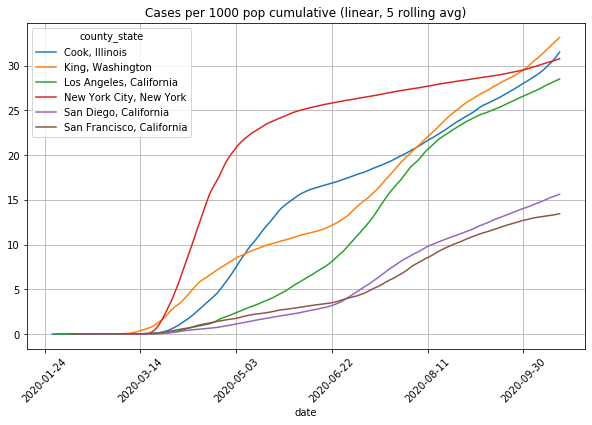

In [50]:
show_graphs(cases_by_pop_df, "Cases per 1000 pop", False, 5)

# Total deaths

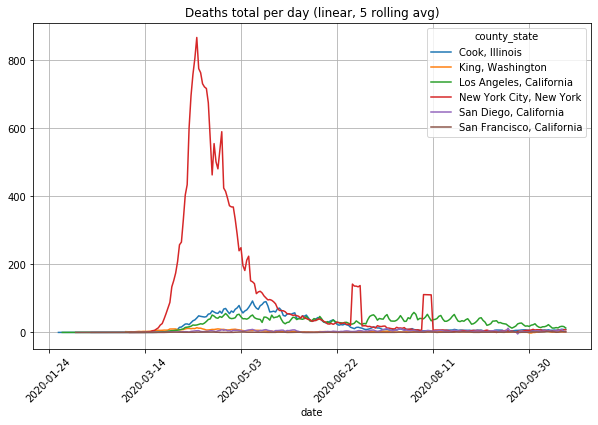

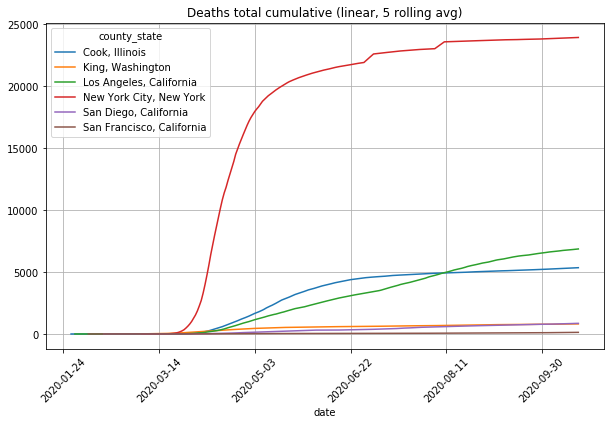

In [51]:
show_graphs(deaths_tot_df, "Deaths total", False, 5)

# Deaths per 1000 people

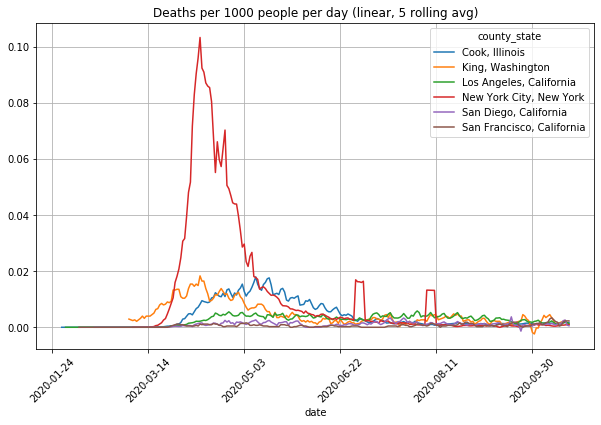

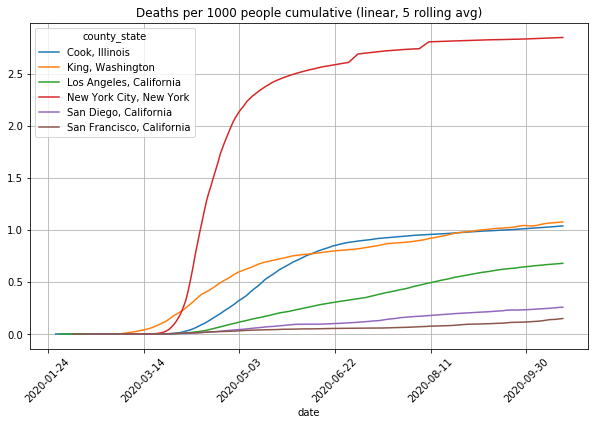

In [52]:
show_graphs(deaths_by_pop_df, "Deaths per 1000 people", False, 5)